In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [5]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
try:
    resp = requests.get(URL)  
    resp.raise_for_status()
    #Read the content directly into pandas from the raw text
    df = pd.read_csv(io.StringIO(resp.text))
    print('Data read into a pandas dataframe!')
    print(df.head()) 
except requests.exceptions.RequestException as e:
    print(f"Error fetching data:{e}") 
except Exception as e:
    print(f"An unexpected error occurred:{e}")

Data read into a pandas dataframe!
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0 

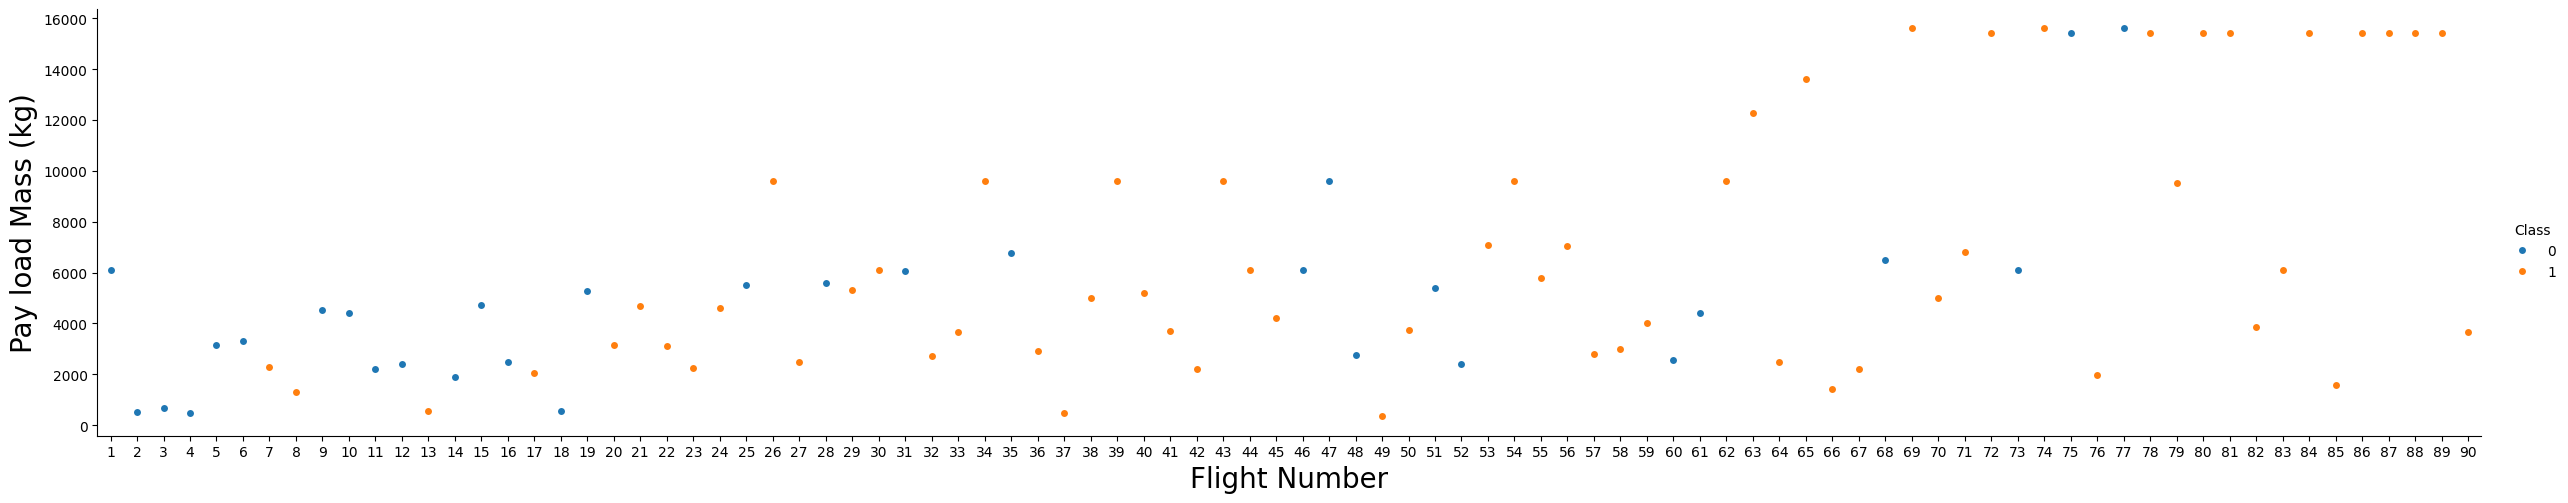

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

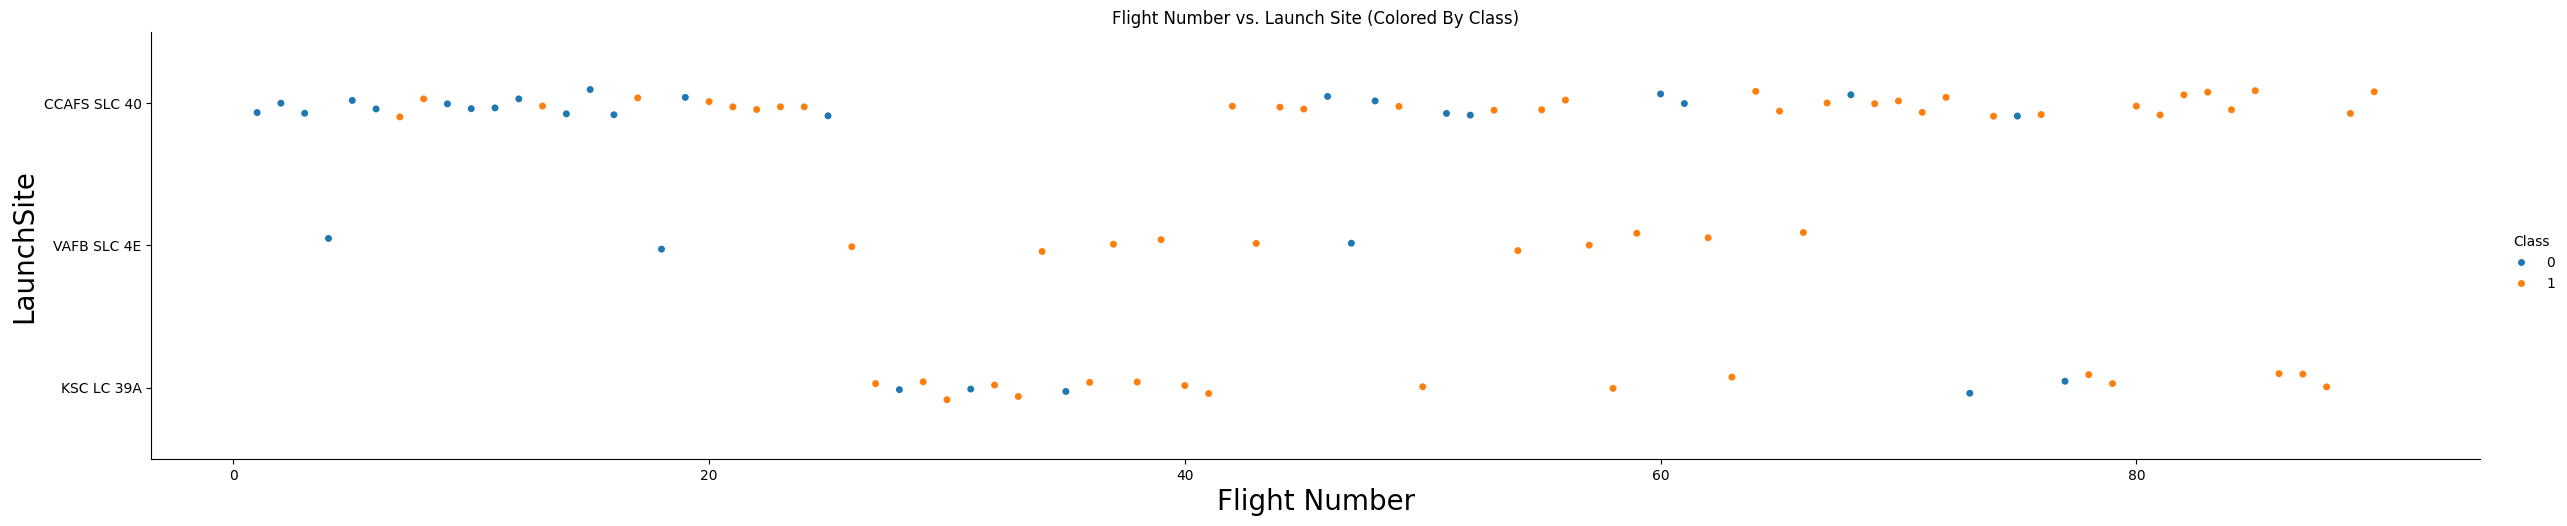

In [10]:
# TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.title("Flight Number vs. Launch Site (Colored By Class)")
plt.show()

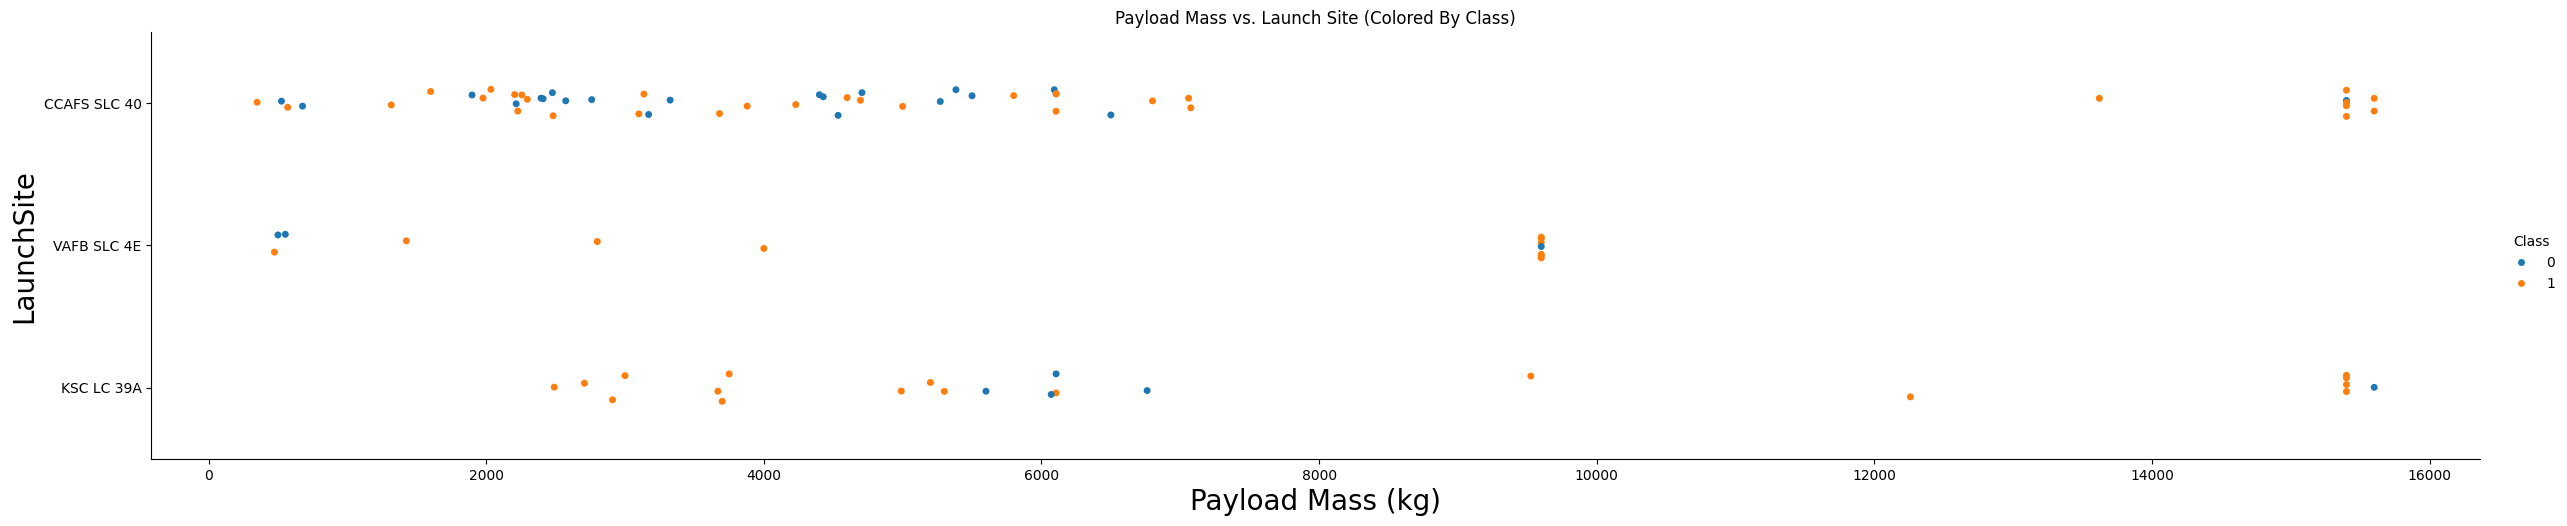

In [11]:
# TASK 2: Visualize the relationship between Payload Mass and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.title("Payload Mass vs. Launch Site (Colored By Class)")
plt.show()

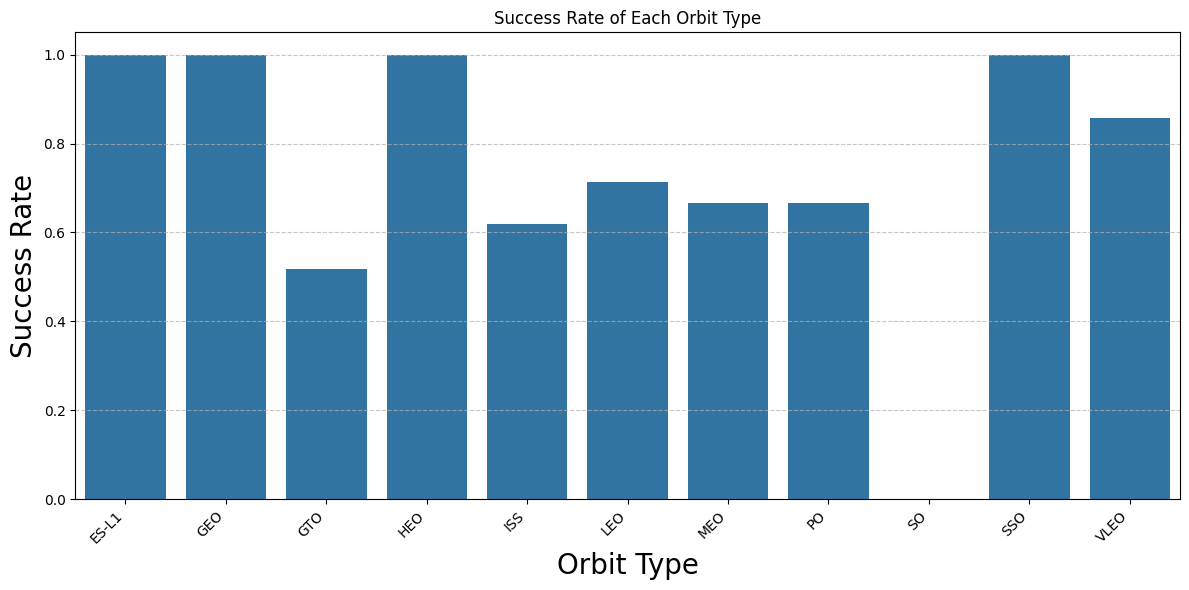

In [15]:
# TASK 3: Visualize the relationship between success rate of each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.rename(columns={'Class': 'SuccessRate'}, inplace=True)
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability if many orbits
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate)
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate of Each Orbit Type")
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

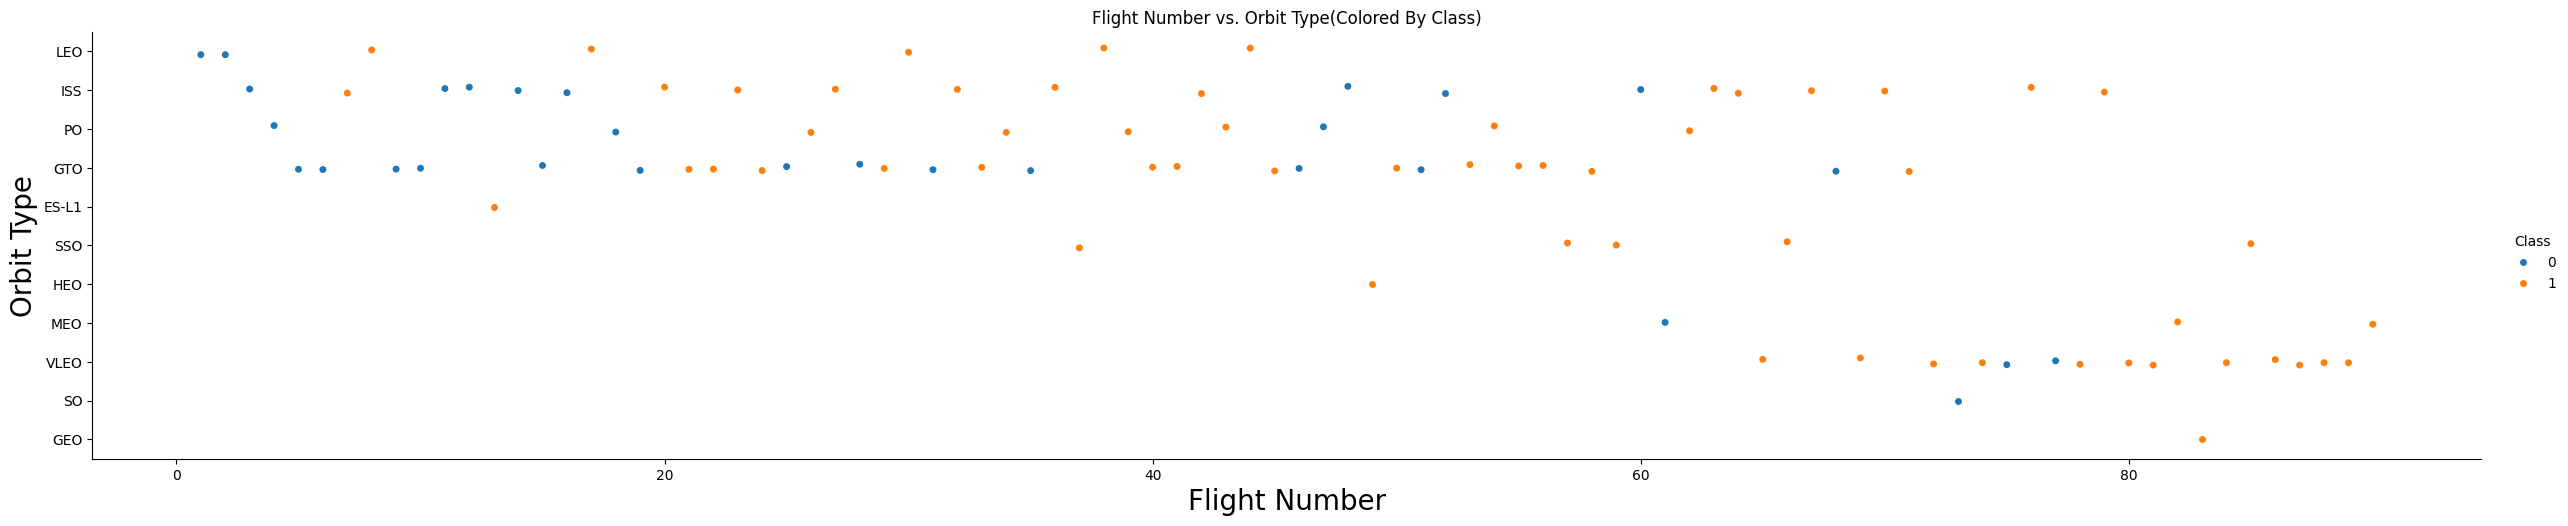

In [16]:
# TASK 4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.title("Flight Number vs. Orbit Type(Colored By Class)")
plt.show()

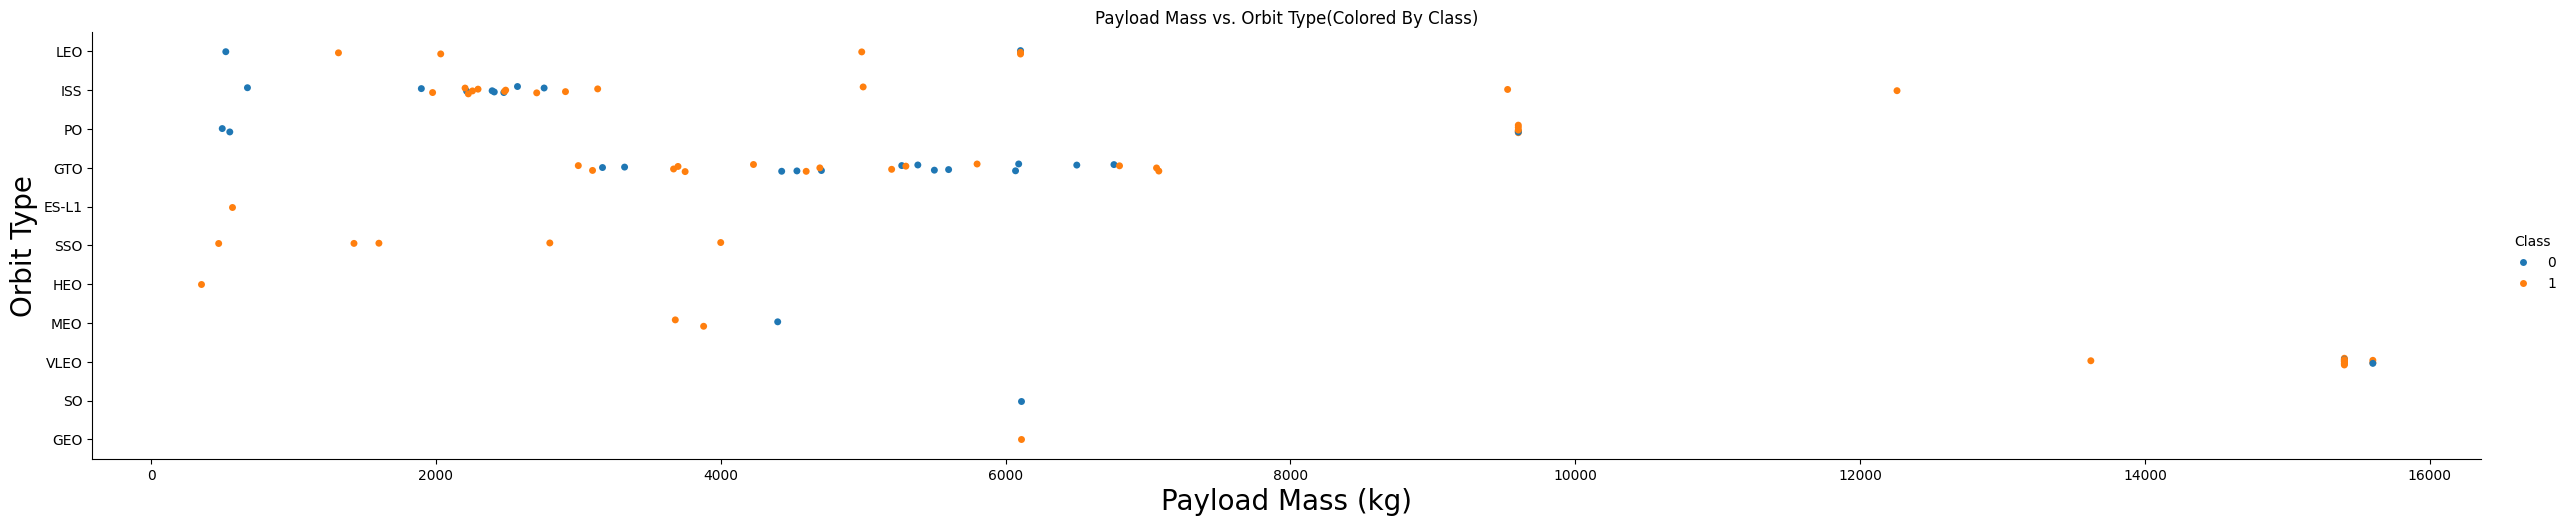

In [17]:
# TASK  5: Visualize the relationship between Payload Mass and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.title("Payload Mass vs. Orbit Type(Colored By Class)")
plt.show()

In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


DataFrame head with 'Year' column:
        Date  Year  Class
0 2010-01-01  2010      0
1 2012-01-01  2012      0
2 2013-01-01  2013      0
3 2013-01-01  2013      0
4 2013-01-01  2013      0

Yearly Success Rate Data:
   Year  AverageSuccessRate
0  2010            0.000000
1  2012            0.000000
2  2013            0.000000
3  2014            0.333333
4  2015            0.333333
5  2016            0.625000
6  2017            0.833333
7  2018            0.611111
8  2019            0.900000
9  2020            0.842105


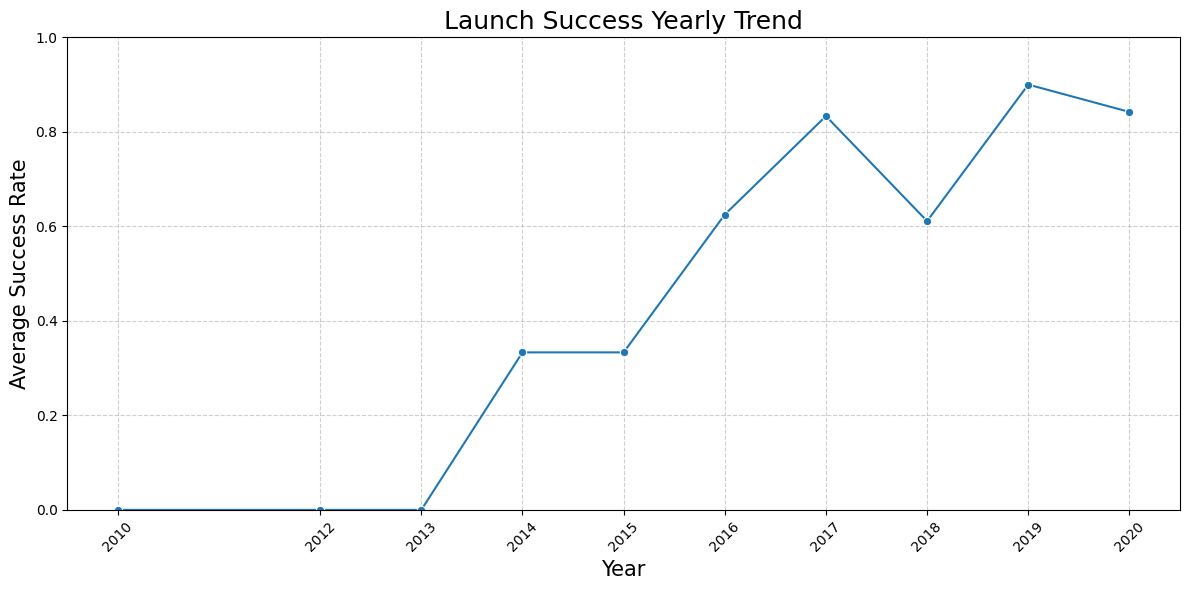

In [20]:
# TASK 6: Visualize the launch success yearly trend 
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].apply(lambda date: date.year)
# Verify the new 'Year' column
print("DataFrame head with 'Year' column:")
print(df[['Date', 'Year', 'Class']].head())

# 2. Calculate the average success rate per year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()
yearly_success_rate.rename(columns={'Class': 'AverageSuccessRate'}, inplace=True)

print("\nYearly Success Rate Data:")
print(yearly_success_rate)


# 3. Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='AverageSuccessRate', data=yearly_success_rate, marker='o') # 'marker' adds points at data points
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.title("Launch Success Yearly Trend", fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.xticks(yearly_success_rate['Year'].astype(int), rotation=45) # Ensure year labels are integers and rotated
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for success rate
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [24]:
# TASK 7: Create dummy variables to categorical columns
categorical_cols=['Orbit','LaunchSite','LandingPad','Serial'] 
features_one_hot=pd.get_dummies(features, columns=categorical_cols, drop_first=False)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# TASK  8: Cast all numeric columns to `float64`
features_one_hot=features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
